In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Importação dos dados

In [4]:
Order_items_caminho='DNC_order_items_dataset.csv'
DfOrder_items=pd.read_csv(Order_items_caminho)

In [5]:
Order_reviews_caminho='DNC_order_reviews_dataset.csv'
DfOrder_reviews=pd.read_csv(Order_reviews_caminho)

In [6]:
Orders_caminho='DNC_orders_dataset.csv'
DfOrder=pd.read_csv(Orders_caminho)

In [7]:
Products_caminho='DNC_products_dataset.csv'
DfProducts=pd.read_csv(Products_caminho)

# Entendimento dos dados

In [8]:
dataframes=['DfOrder_items', 'DfOrder_reviews', 'DfOrder', 'DfProducts']

In [9]:
DfOrder_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     112650 non-null  int64  
 1   order_id       112650 non-null  object 
 2   order_item_id  112650 non-null  int64  
 3   product_id     112650 non-null  object 
 4   price          112650 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.3+ MB


In [10]:
DfOrder_items['order_id'].duplicated().value_counts()

False    98666
True     13984
Name: order_id, dtype: int64

In [11]:
DfOrder_items.head(10)

,Unnamed: 0,order_id,order_item_id,product_id,price
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,21.90
6,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90
7,7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,810.00
8,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95
9,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,53.99


In [12]:
DfOrder_items=DfOrder_items.drop(columns='Unnamed: 0')

In [13]:
DfOrder_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    99224 non-null  int64 
 1   review_id     99224 non-null  object
 2   order_id      99224 non-null  object
 3   review_score  99224 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.0+ MB


In [14]:
DfOrder_reviews=DfOrder_reviews.drop(columns='Unnamed: 0')

In [15]:
DfOrder_reviews['review_score'].value_counts()

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64

In [16]:
DfOrder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    99441 non-null  int64 
 1   order_id      99441 non-null  object
 2   customer_id   99441 non-null  object
 3   order_status  99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [17]:
DfOrder['order_id'].duplicated().value_counts()

False    99441
Name: order_id, dtype: int64

In [18]:
DfOrder['customer_id'].duplicated().value_counts()

False    99441
Name: customer_id, dtype: int64

In [19]:
DfOrder=DfOrder.drop(columns='Unnamed: 0')

In [20]:
DfProducts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


In [21]:
DfProducts['product_id'].duplicated().value_counts()

False    32951
Name: product_id, dtype: int64

In [22]:
DfProducts=DfProducts.drop(columns='Unnamed: 0')

# Estruturação dos dados

In [23]:
#Merge das informações

dfMerge1 = DfOrder.merge(DfOrder_reviews, how='left', left_on='order_id', right_on='order_id',suffixes=['.Order','.reviews'])
dfMerge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      99992 non-null  object 
 1   customer_id   99992 non-null  object 
 2   order_status  99992 non-null  object 
 3   review_id     99224 non-null  object 
 4   review_score  99224 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [24]:
dfMerge2=dfMerge1.merge(DfOrder_items, how='left', left_on='order_id', right_on='order_id',suffixes=['.OrderReviews','.items'])
dfMerge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       114092 non-null  object 
 1   customer_id    114092 non-null  object 
 2   order_status   114092 non-null  object 
 3   review_id      113131 non-null  object 
 4   review_score   113131 non-null  float64
 5   order_item_id  113314 non-null  float64
 6   product_id     113314 non-null  object 
 7   price          113314 non-null  float64
dtypes: float64(3), object(5)
memory usage: 7.8+ MB


In [25]:
dfMerge3=dfMerge2.merge(DfProducts,how='left',left_on='product_id',right_on='product_id',suffixes=['.items','.product'])
dfMerge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    114092 non-null  object 
 1   customer_id                 114092 non-null  object 
 2   order_status                114092 non-null  object 
 3   review_id                   113131 non-null  object 
 4   review_score                113131 non-null  float64
 5   order_item_id               113314 non-null  float64
 6   product_id                  113314 non-null  object 
 7   price                       113314 non-null  float64
 8   product_category_name       111702 non-null  object 
 9   product_name_lenght         111702 non-null  float64
 10  product_description_lenght  111702 non-null  float64
 11  product_weight_g            113296 non-null  float64
 12  product_length_cm           113296 non-null  float64
 13  product_height

<AxesSubplot:>

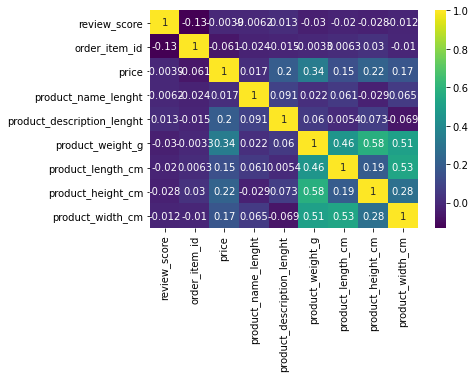

In [26]:
sns.heatmap(dfMerge3.corr(),annot=True,cmap='viridis')

# Tratamento dos dados

In [27]:
dfMerge3.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
review_id                      961
review_score                   961
order_item_id                  778
product_id                     778
price                          778
product_category_name         2390
product_name_lenght           2390
product_description_lenght    2390
product_weight_g               796
product_length_cm              796
product_height_cm              796
product_width_cm               796
dtype: int64

In [28]:
#Categorias nulas representam 3% dos dados, sendo assim vão ser excluídas

dfMerge3=dfMerge3.dropna(axis=0)

In [29]:
dfMerge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110773 entries, 0 to 114091
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    110773 non-null  object 
 1   customer_id                 110773 non-null  object 
 2   order_status                110773 non-null  object 
 3   review_id                   110773 non-null  object 
 4   review_score                110773 non-null  float64
 5   order_item_id               110773 non-null  float64
 6   product_id                  110773 non-null  object 
 7   price                       110773 non-null  float64
 8   product_category_name       110773 non-null  object 
 9   product_name_lenght         110773 non-null  float64
 10  product_description_lenght  110773 non-null  float64
 11  product_weight_g            110773 non-null  float64
 12  product_length_cm           110773 non-null  float64
 13  product_height

# Criação do modelo

In [30]:
#Modelo filtro colaborativo

#1000 usuários mais ativos

user_count=dfMerge3.groupby(by='customer_id',as_index=False).agg({'order_id':pd.Series.nunique}).rename(columns={'order_id':'order_count'})
shop_count=user_count.set_index('customer_id')

top1000_users=shop_count.sort_values('order_count',ascending=False).head(1000)
#top1000_users=top1000_users.index.tolist()

top1000_users

,order_count
customer_id,
00012a2ce6f8dcda20d059ce98491703,1
aa5e341090958e5111abe3ba75bcfe87,1
aa625e70d5e95d9b5c2c24e78fa0d75c,1
aa6190994371836fc1d4596edd827abd,1
aa606152f23a5fa9ba3d0b87f7a492e8,1
...,...
a7e7f8dff23d4445f62bebd3c2b0078e,1
a7e7ac71f48352503ff2a018aa31002d,1
a7e6b8b50366b318fc25f4b8fabb39b2,1


In [31]:
#Modelo filtro colaborativo

#1000 produtos mais comprados

product_count=dfMerge3.groupby(by='product_id',as_index=False).agg({'order_id':pd.Series.nunique}).rename(columns={'order_id':'order_count'})
shop_count=product_count.set_index('product_id')

top1000_products=shop_count.sort_values('order_count',ascending=False).head(1000)
#top1000_users=top1000_users.index.tolist()

top1000_products

,order_count
product_id,
99a4788cb24856965c36a24e339b6058,458
aca2eb7d00ea1a7b8ebd4e68314663af,429
422879e10f46682990de24d770e7f83d,351
d1c427060a0f73f6b889a5c7c61f2ac4,320
389d119b48cf3043d311335e499d9c6b,310
...,...
25d6edcd216a9ee579f19f92d694f7d5,14
e8c6039a25765995ac7c1ec2cbef5765,14
81b6c7c058add831803fcbba6dcc1df2,14


In [201]:
#Modelo filtro colaborativo

#produtos melhor classificados

product_rated=dfMerge3.groupby(by='product_id',as_index=False).agg({'review_score':np.mean}).rename(columns={'review_score':'soma_rate'})
shop_count=product_rated.set_index('product_id')

top100_products_score=shop_count.sort_values('soma_rate',ascending=False)
top100_products_score=top100_products_score.reset_index()

top100_products_score

,product_id,soma_rate
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,6000cda32a1e7f6919ae1fcdf1d6259a,5.0
2,5fe490e61e7a37f2f0d1ad1771ac027d,5.0
3,c6ab810300ecce0784a66d36fcb5560f,5.0
4,c6ab3d8f4227913c4fa99e94ef84aa70,5.0
...,...,...
32178,336b5407e252cac6f4e4270979cec8ad,1.0
32179,b0c7a71c8620bd389e240f63a507dc50,1.0
32180,86304b9e4529f2686bc91f37c6392801,1.0
32181,334f9a7bc70ecefea3a1fc7dd1c7ec76,1.0


In [34]:
#Modelo filtro colaborativo

#10 categorias mais compradas

product_category_count=dfMerge3.groupby(by='product_category_name',as_index=False).agg({'order_id':pd.Series.nunique}).rename(columns={'order_id':'order_count'})
shop_count=product_category_count.set_index('product_category_name')

top10_products_category=shop_count.sort_values('order_count',ascending=False).head(10)
#top1000_users=top1000_users.index.tolist()

top10_products_category

,order_count
product_category_name,
cama_mesa_banho,9313
beleza_saude,8771
esporte_lazer,7669
informatica_acessorios,6649
moveis_decoracao,6398
utilidades_domesticas,5843
relogios_presentes,5576
telefonia,4168
automotivo,3877


In [35]:
#Modelo filtro colaborativo

#10 categorias melhor classificados

product_category_bestreviews=dfMerge3.groupby(by='product_category_name',as_index=False).agg({'review_score':np.mean}).rename(columns={'review_score':'review_sum'})
shop_count=product_category_bestreviews.set_index('product_category_name')

top10_products_category_review=shop_count.sort_values('review_sum',ascending=False).head(10)
#top1000_users=top1000_users.index.tolist()

top10_products_category_review

,review_sum
product_category_name,
cama_mesa_banho,43386.0
beleza_saude,39957.0
esporte_lazer,35493.0
moveis_decoracao,32520.0
informatica_acessorios,30853.0
utilidades_domesticas,28154.0
relogios_presentes,23914.0
telefonia,17828.0
ferramentas_jardim,17501.0


In [209]:
matriz_de_relacionamento_best_reviews = dfMerge3[dfMerge3["product_id"].isin(top100_products_score["product_id"])] \
  .pivot_table(index="product_id", columns="product_category_name", values="review_score").fillna(0)

matriz_de_relacionamento_best_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32183 entries, 00066f42aeeb9f3007548bb9d3f33c38 to fffe9eeff12fcbd74a2f2b007dde0c58
Data columns (total 73 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agro_industria_e_comercio                       32183 non-null  float64
 1   alimentos                                       32183 non-null  float64
 2   alimentos_bebidas                               32183 non-null  float64
 3   artes                                           32183 non-null  float64
 4   artes_e_artesanato                              32183 non-null  float64
 5   artigos_de_festas                               32183 non-null  float64
 6   artigos_de_natal                                32183 non-null  float64
 7   audio                                           32183 non-null  float64
 8   automotivo                                      32183 non-null 

In [203]:
#matriz de similaridade

cos_products=cosine_similarity(matriz_de_relacionamento_best_reviews)

cos_products.shape

(32183, 32183)

In [220]:
def recomendar(product_id):
  print(f"Produto observado: {product_id}")
  try:
    produto_x = matriz_de_relacionamento_best_reviews.index.tolist().index(product_id)
    top10_recomendados = np.argsort(-cos_products[produto_x])[1:11]
    print(top10_recomendados)
    print()
    print(f"Retornando os 10 produtos mais similares de: {product_id}.")
    print(matriz_de_relacionamento_best_reviews.index[top10_recomendados])
  except ValueError as e:
    print(f"{product_id}, não está incluso na matriz de recomendação. Retornando os 10 comprados")
    print(top100_products_score['product_id'].tolist())


# Teste do Modelo

In [221]:
top30=recomendar('00066f42aeeb9f3007548bb9d3f33c38')

Produto observado: 00066f42aeeb9f3007548bb9d3f33c38
[30995 23022 23025 28835 28833 31011 28826  1221 23036  5273]

Retornando os 10 produtos mais similares de: 00066f42aeeb9f3007548bb9d3f33c38.
Index(['f695f05f9b5b47de78cd7278d748487f', 'b79a274e7373a1bfcbd788a239591dec',
       'b7a2d0cb90ba252129d34d7c8d079d2b', 'e5433d154f98bcb2c139b9679fce0814',
       'e5403f78625641d4ae41af599772fbfd', 'f6bbece0c618d7313bbaf6fc919149b8',
       'e53197022fd9f554e01b9cf4f3c9f249', '09cb4aa62c518d0842e1c5f28ac940ff',
       'b7b00b45c6be180aba844784c6769d12', '28f486789a96800dc97bb98e780e6d31'],
      dtype='object', name='product_id')
